In [ ]:
import pandas as pd
from google.colab import files

files.upload()
!ls

df = pd.read_excel('task2.xlsx', index_col=0)#Data Frame
df

Saving task2.xlsx to task2.xlsx
sample_data  task2.xlsx


,sbp,bmi,age,experience
0,134.862052,34.497381,44.777405,29.106322
1,148.332967,25.552974,57.021564,23.665780
2,136.575617,25.887313,48.978573,18.827713
3,149.648299,23.708126,49.789848,19.386960
4,125.409260,31.461631,36.781697,9.386208
...,...,...,...,...
95,126.441369,28.309360,29.880297,7.852938
96,142.887801,26.624585,51.335485,15.969681
97,144.097863,28.174387,50.290016,28.893091
98,136.944583,25.519997,52.869515,26.692675


In [ ]:
import numpy as np
A = np.zeros((2,2))
A[0,0] = df['experience'].dot(df['experience'])
A[0,1] = df['experience'].sum()
A[1,0] = A[0,1]
A[1,1] = df.shape[0]
b = np.zeros(2)
b[0] = df['sbp'].dot(df['experience'])
b[1] = df['sbp'].sum()
np.linalg.solve(A, b)

array([  0.54322085, 126.8684478 ])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='experience', ylabel='sbp'>

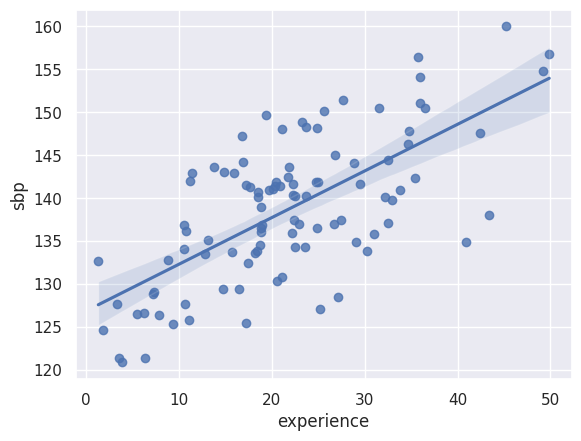

In [ ]:
sns.set_theme(color_codes=True)

sns.regplot(x="experience", y="sbp", data=df[['experience','sbp']], ci=95)
#df

In [ ]:
model = LinearRegression()
x = np.array(df['experience']).reshape((-1, 1))
model.fit(x, df['sbp'])

LinearRegression()

In [ ]:
print(model.score(x, df['sbp']))

0.46347697608230776


In [ ]:
print(model.intercept_)
print(model.coef_)

126.8684477974939
[0.54322085]


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

print(reg.coef_)

print(reg.intercept_)

reg.predict(np.array([[3, 5]]))

[1. 2.]
3.0000000000000018


array([16.])

Регрессионный анализ - одна из важнейших областей статистики и машинного обучения. Существует множество методов регрессии (линейная, полиномиальная, логистическая и т. д.).

Линейная регрессия - простейший и одновременно с тем один из основных методов статистически и машинного обучения.
В этом уроке вы изучите методы построения гинейных регрессионных моделей.

После изучения этого урока вы будете знать:
*  когда можно строить линейные  регрессионные модели, т. е. какие условия наклдываются на исходные данные и связи между ними;
*  какие пакеты позволяют строить и исследовать регрессионные модели;
*  как интерпретировать результаты, полученные при построении регрессионной модели;
*  как визуализировать исходные данные и полученные регрессионные модели.

#Теоретический блок

После того, как методами корреляционного анализа установлено, что существует линейная связь между признаками, естественно возникает вопрос, как описать эту связь в виде формулы. Например, пусть установлено, что цены на нефть влияют на доходную часть бюджета, требуется узнать,
*  на сколько увеличивается доход в бюджет при увеличении цены на нефт на один доллар за беррель;
*  какой ожидается доход в бюджет, если цена на нефть установится на уровне 80 долларов за баррель.


**Определение:**
Регрессионный анализ - статистический метод исследования влияния одной или нескольких независимых переменных $X_1, X_2, \ldots, X_m$ на зависимую переменную $Y.$ При этом предполагается, что связь между переменными имеет вид

$Y = f(X_1, X_2, \ldots, X_m; a) + \varepsilon,$

где $a$ --- вектор параметров, подлежащих оценке, $f$ --- известная функция $\varepsilon$ --- случайная ошибка.

Функцию $f$ называют функцией регрессии. Если функция $f$ имеет вид $a_1 X_1 + a_2 X_2 + \ldots + a_n X_m + a_0,$ то регрессию называют линейной. Независимые переменные иначе называют предикторами или факторами; зависимую величину называют регрессором. Терминология зависимых и независимых переменных отражает лишь математическую зависимость переменных, а не причинно-следственные отношения.


**Как определить параметры**

Для оценки параметров прововдят $n$ наблюдений за факторами и зависимой величиной. Пусть в первом наблюдении получены $Y_1, X_{11}, \ldots, X_{m1},$ во втором --- $Y_2, X_{12}, \ldots, X_{m2},$ и так далее, в $n$-ом наблюдении --- $Y_n, X_{1n}, \ldots, X_{mn}.$ При этом разница  $Y_i - f(X_{1i}, \ldots, X_{mi}; a) = \varepsilon_i$ --- это  ошибка в $i$-ом наблюдении, $i=1, 2, \ldots, n.$


**Требования к исходным данным**

В классической линейной регрессии предполагается, что выполнены  следующие предположения:

* ошибки распределены по нормальному закону;
* математическое ожидание ошибок равно нулю;
* случайные ошибки модели гомоскедастичные, т. е. дисперсия ощибок постоянная, не зависит от значений предикторов;
* корреляции случайных ошибок отсутствует.

При выполнении классических предположений обычный метод наименьших квадратов позволяет получить достаточно качественные оценки параметров модели, а именно: они являются несмещенными, состоятельными и наиболее эффективными оценками.

# Задача 1

Явно заданы массивы значения предиктора x и зависимой велчины (регрессора) y:

x = [5, 15, 25, 35, 45, 55]

y = [5, 20, 14, 32, 22, 38]

Построить линейную регрессию: $y = b_0 + b_1  x$

### Шаг 1
Начать надо с подключения нужных пакетов.

Пакет scikit-learn - это широко используемая библиотека Python для машинного обучения, построенная на основе NumPy и некоторых других пакетов. Пакет scikit-learn предоставляет средства для предварительной обработки данных, построения регрессии, а так же уменьшения размерности, классификации, кластеризации и многого другого. Пакет scikit-learn имеет открытый исходный код.

Узнать подробнее о линейных моделях и получить более глубокое представление о том, как работает этот пакет, можно на странице Generalized Linear Models https://scikit-learn.org/stable/modules/linear_model.html.

Если вы хотите реализовать линейную регрессию и вам нужны функциональные возможности, выходящие за рамки scikit-learn, можно обратиться к пакету  statsmodels. Это мощный пакет Python для оценки статистических моделей, выполнения тестов и многого другого. Этот пакет тоже открытый исходный код. https://www.statsmodels.org/stable/index.html.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Основным типом данных NumPy является тип numpy.ndarray. В этом уровке мы будем использовать термин "массив" для обозначения экземпляров типа numpy.ndarray. Не путать с list - списком Python.

### Шаг 2

Второй шаг - определение данных для работы. Входные данные (регрессоры,  x) и выходные данные (предиктор, y) должны быть массивами (экземплярами класса numpy.ndarray) или подобными объектами.

In [ ]:
x = np.array([5, 15, 25, 30, 35, 45, 55])
y = np.array([5, 20, 14, 22, 32, 22, 38])

print(x)
print(y)


[ 5 15 25 30 35 45 55]
[ 5 20 14 22 32 22 38]


Визуализируем данные, чтобы оценить, насколько оправдано применения линейной регрессии.

,x,y
0,5,5
1,15,20
2,25,14
3,30,22
4,35,32
5,45,22
6,55,38


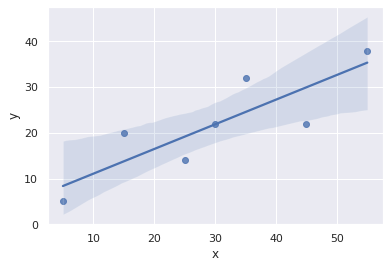

In [ ]:
sns.set_theme(color_codes=True)
df = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])
sns.regplot(x="x", y="y", data=df, ci=95)
df

Необходимо вызвать .reshape() для x, потому что этот массив должен быть двумерным, или, если быть более точным, иметь один столбец и столько строк, сколько необходимо. Это может показаться странным при построении *парной* линейной регресии; однако, при построении *множественной* линейной регресии станет очевидно, что данный подход удобен и оправдан.

In [ ]:
x = x.reshape((-1, 1))
print(x)

[[ 5]
 [15]
 [25]
 [30]
 [35]
 [45]
 [55]]


### Шаг 3

Следующим шагом является создание модели линейной регрессии и ее подгонка (англ. fit) к существующим данным.

Создадим модель как экземпляр LinearRegression. Можно предать LinearRegression несколько дополнительных параметров:
*  fit_intercept
*  normalize
*  copy_X
*  n_jobs
В этом примере используются значения по умолчанию для всех параметров.

In [ ]:
model = LinearRegression()

Далее можно пользоваться моделью.

Во-первых, нужно вызвать .fit () для модели. С помощью .fit () вычисляются оптимальные значения весов $b_0$ и $b_1,$ на основе  существующих входных данных x и y. Другими словами, .fit () выполняет подгонку модели.

In [ ]:
model.fit(x, y)

LinearRegression()

### Шаг 4

Нужно проверить, насколько качественно моель построена.
Для этого можено получить коэффициент детерминации ($R^2$) с помощью метода .score(), вызванного для модели.

**Вопрос для обсуждения**

Каков содержательный смысл коэффициента детерминации? В каких пределах меняется коэффициент детерминации?

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7158517034068136


Атрибуты модели:
*  .intercept_, константа $b_0$,
*  .coef_, массив коэффициентов при предикторах, в данном случае состоит только из одного элемента $b_1,$ так как регрессия *парная*.

**Вопрос для обсуждения**

Каков содержательный смысл коэффициента $b_0$ и $b_1$?

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.657142857142851
slope: [0.54]


### Шаг 5

Как только будет построена удовлетворительная модель парной линейной регрессии, ее можно использовать для прогнозов с использованием существующих или новых данных.

Чтобы получить прогнозируемый ответ, можно использовать метод .predict ():

In [ ]:
x_new = np.array([i for i in range(20, 60, 10)]).reshape((-1, 1))
y_pred = model.predict(x_new)
for i in range(len(y_pred)):
  print(x_new[i,0], '\t', round(y_pred[i], 2))

20 	 16.46
30 	 21.86
40 	 27.26
50 	 32.66


При применении метода .predict () в качестве аргумента передают регрессор и получают соответствующий прогнозируемый ответ.

Вот еще один, почти идентичный, способ предсказать ответ:

In [ ]:
 y_pred = model.intercept_ + model.coef_ * x_new
 print(y_pred)

[[14.46397225 10.6230889 ]
 [18.93466874 13.17334371]
 [23.40536523 15.72359853]
 [27.87606172 18.27385334]]


# Задача 2
Данная задача носит теретический характер. Она призвана

*  прояснить смысл параметров, входящих в уравнение парной линейной регрессии;
*  показать зависимость параметров от входных данных, объема выборки и иных параметров.

Сгенерировать набор псевдослучаных чисел, x и y, - выборку, извлеченную из двумерной нормально распределенной генеральной совокупности.

Объем выборки определяется параметром sampleSize.

Случайные величины X и Y связаны линейной связью:
Y = regConst + regCoef * X + error,
где
error - случайная величина со ст. отклонением = noise, мат. ожиданием = 0.

Исследовать,

*  как зависит коэффициент детерминации от параметра noise;
*  чему будет равен коэффициент детерминации, когда параметр noise = 0;
*  как зависит коэффициент детерминации от параметра regCoef;
*  как зависит коэффициент детерминации от объема выборки;
*  как зависит ширина 95% доверительного интервала в прогнозах от параметра noise;
*  как зависит ширина 95% доверительного интервала в прогнозах от объема выборки.


Coefficient of determination 98.7115078418499 %
Coefficient of determination 30.55297871217489
Coefficient of determination [0.99448254]


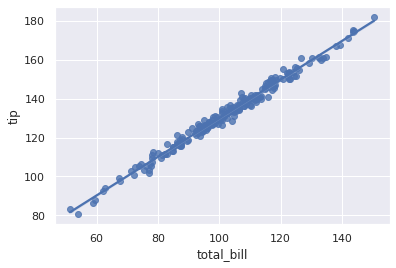

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)
noise = 2
sampleSize = 200
regCoef = 1
regConst = 30

#Here parameters std. dev = 20 and mean = 100 were chosen arbitrarily
x = 20 * np.random.randn(sampleSize) + 100

y = 1 * x + 30 + noise * np.random.randn(sampleSize)
df = pd.DataFrame(list(zip(x, y)), columns=['total_bill', 'tip'])
sns.regplot(x="total_bill", y="tip", data=df)

x = x.reshape((-1, 1))
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('Coefficient of determination', r_sq * 100, '%')
print('Coefficient of determination', model.intercept_)
print('Coefficient of determination', model.coef_)

Coefficient of determination 90.5985450223023 %
Coefficient of determination 37.11849430707508
Coefficient of determination [0.97847758]


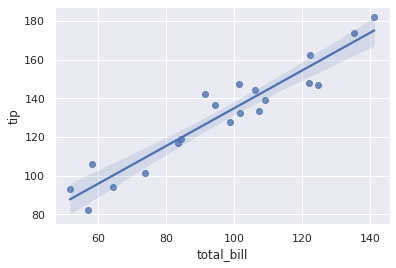

In [ ]:
#При увеличении noise до 10, коэффициент детерминации уменьшается
#При увеличении noise до 10, 95% доверительные интервалы
#для прогнозируемых значений увеличиваются (становятся шире)
noise = 10
sampleSize = 20
regCoef = 1
regConst = 30

#Here parameters std. dev = 20 and mean = 100 were chosen arbitrarily
x = 20 * np.random.randn(sampleSize) + 100

y = 1 * x + 30 + noise * np.random.randn(sampleSize)
df = pd.DataFrame(list(zip(x, y)), columns=['total_bill', 'tip'])
sns.regplot(x="total_bill", y="tip", data=df)

x = x.reshape((-1, 1))
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('Coefficient of determination', r_sq * 100, '%')
print('Coefficient of determination', model.intercept_)
print('Coefficient of determination', model.coef_)

Coefficient of determination 80.10810368749839 %
Coefficient of determination 31.09486990050337
Coefficient of determination [0.98316861]


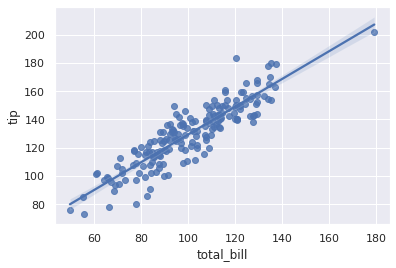

In [ ]:
#При увеличении объема выборки, 95% доверительные интервалы сужаются
noise = 10
sampleSize = 180
regCoef = 1
regConst = 30

#Here parameters std. dev = 20 and mean = 100 were chosen arbitrarily
x = 20 * np.random.randn(sampleSize) + 100

y = 1 * x + 30 + noise * np.random.randn(sampleSize)
df = pd.DataFrame(list(zip(x, y)), columns=['total_bill', 'tip'])
sns.regplot(x="total_bill", y="tip", data=df)

x = x.reshape((-1, 1))
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print('Coefficient of determination', r_sq * 100, '%')
print('Coefficient of determination', model.intercept_)
print('Coefficient of determination', model.coef_)

#### Задача 3

Явно заданы массивы значений предиктора x и зависимой велчины (регрессора) y:

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]

y = [4, 5, 20, 14, 32, 22, 38, 43]

Построить линейную регрессию: $y = b_0 + b_1 x_1 + b_2 x_2.$



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)


model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


# Ответы на вопросы

Коэффициент детерминации характеризует долю объясненной дисперсии. Коэффициент детерминации меняется от 0 до 1, чем он больше тем точнее модель.

В модели парной линейной регрессии коэффициент $b_1$ при независимой величине имеет содержательный смысл: при увеличении предиктора на еницу своего измерения ргерессор увеличивается на $b_1.$